<h1>Algo Genéticos: Problemas de las N Reinas</h1>

In [1]:
import random
!pip install pyeasyga
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

  Preparing metadata (setup.py) ... done
  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6788 sha256=5a3e2882154c4c9458e8da9d144797f4fd03fbba83f947abeda484d8b1396450
  Stored in directory: /root/.cache/pip/wheels/a7/92/a5/adeab3fb04006374ec9a017fbb3a8139643ccfd6ad83a0c85f
Successfully built pyeasyga


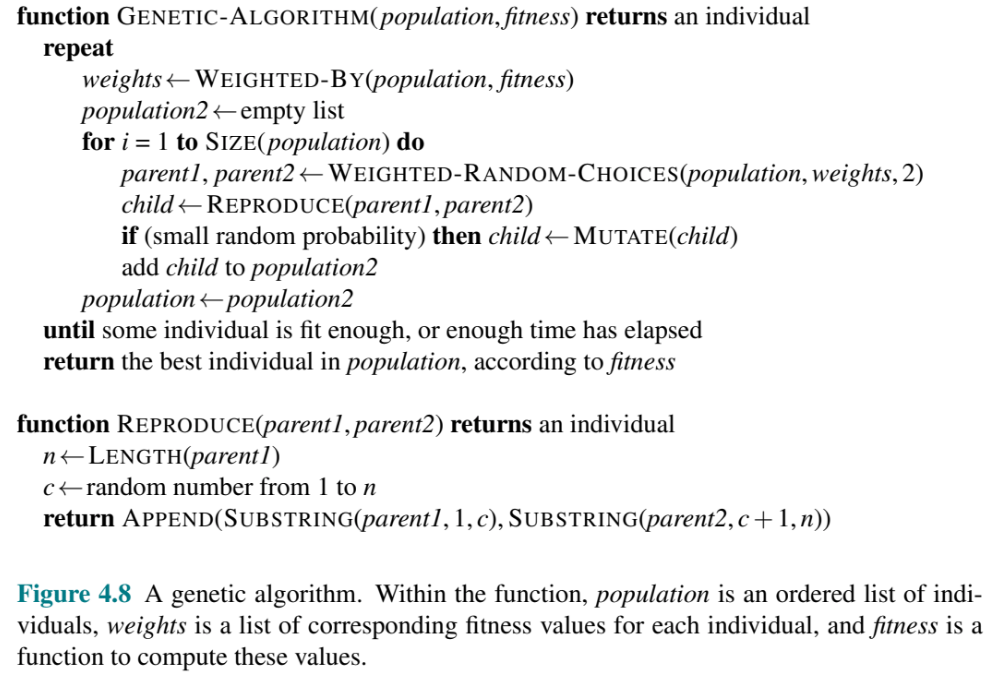

Texto guía: **Artificial Intelligence: A Modern Approach, 4th** Rusell and Norvig

<h3>Representación</h3>
Cada solución va ser representada como un vector de tamaño N. - N en este caos es cada posible columna del tablero y cada valor de dimensión la columna.

In [2]:
# Inicialice su representacion
# 1. No se pueden repetir números en la representación?, pq?
# 2. Que tengo que hacer si quiero un tablero mas grande?

#representacion = [0, 1, 2, 3, 4, 5, 6, 7]
nReinas = 20
representacion = []
for val in range(nReinas):
  representacion.append(val)

In [3]:
# Vamos a utilizar la librería pyeasyga que se encarga de los procesos de iteración del algoritmo. Creamos una instancia de la clase.
ga = pyeasyga.GeneticAlgorithm(representacion,
                            population_size=100,
                            generations=100,
                            crossover_probability=0.8,
                            mutation_probability=0.2,
                            elitism=True,
                            maximise_fitness=False)

<h3>Creacion de funciones</h3>

<h4>Una función para imprimir el tablero</h4>

In [4]:
def print_board(board_representation):
    def print_x_in_row(row_length, x_position):
        print('', end = '')
        for _ in range(row_length):
            print('---', end = '')
        print('\n|', end = '')
        for i in range(row_length):
            if i == x_position:
                print('{} |'.format('X'), end = '')
            else:
                print('  |', end = '')
        print('')

    def print_board_bottom(row_length):
        print('', end = '')
        for _ in range(row_length):
            print('---', end = '')

    num_of_rows = len(board_representation)
    row_length = num_of_rows    #rows == columns in a chessboard

    for row in range(num_of_rows):
        print_x_in_row(row_length, board_representation[row])

    print_board_bottom(row_length)
    print('\n', end = '')

<h4>Función de creación de individuos</h4>

In [5]:
#Funcion que crea individuos, para la creacion de la población inicial
def create_individual(data):
    individual = data[:]
    random.shuffle(individual)
    return individual

#Ejemplos de dos individuos que siguen nuestra representación
ind1eje = create_individual(representacion)
ind2eje = create_individual(representacion)

print(ind1eje)
print(ind2eje)

#Una vez la creamos la asignamos a nuestra instancia de ga.
ga.create_individual = create_individual

[2, 17, 6, 0, 16, 12, 18, 13, 8, 15, 11, 5, 10, 9, 19, 3, 14, 7, 4, 1]
[7, 4, 13, 14, 16, 9, 15, 12, 8, 3, 5, 18, 1, 19, 6, 10, 11, 0, 17, 2]


<h3>Creación de función de crossover</h3>

In [6]:
# Ahora definimos nuestra función de crossover
def crossover(parent_1, parent_2):
    crossover_index = random.randrange(1, len(parent_1))
    child_1a = parent_1[:crossover_index]
    child_1b = [i for i in parent_2 if i not in child_1a]
    child_1 = child_1a + child_1b

    child_2a = parent_2[crossover_index:]
    child_2b = [i for i in parent_1 if i not in child_2a]
    child_2 = child_2a + child_2b

    return child_1, child_2

#Ejemplo de operador de crossover
print(crossover(ind1eje,ind2eje))


#Una vez la creamos la asignamos a nuestra instancia ga.
ga.crossover_function = crossover

([2, 17, 7, 4, 13, 14, 16, 9, 15, 12, 8, 3, 5, 18, 1, 19, 6, 10, 11, 0], [13, 14, 16, 9, 15, 12, 8, 3, 5, 18, 1, 19, 6, 10, 11, 0, 17, 2, 7, 4])


<h3>Creamos la función de mutación</h3>

In [7]:
#Definimos la función de mutación
def mutate(individual):
    mutate_index1 = random.randrange(len(individual))
    mutate_index2 = random.randrange(len(individual))
    individual[mutate_index1], individual[mutate_index2] = individual[mutate_index2], individual[mutate_index1]

print(ind1eje)
mutate(ind1eje)
print(ind1eje)

#Una vez la creamos la asignamos a nuestra instancia ga.
ga.mutate_function = mutate

[2, 17, 6, 0, 16, 12, 18, 13, 8, 15, 11, 5, 10, 9, 19, 3, 14, 7, 4, 1]
[2, 17, 6, 0, 16, 12, 18, 13, 8, 15, 11, 19, 10, 9, 5, 3, 14, 7, 4, 1]


In [8]:
# Función de selección!!, población es un objeto que contiene los individuos y sus atributos como la función de fitness
def selection(population):
    prob = []
    for val in population:
      ind = val.genes
      for times in range(nReinas-val.fitness):
        prob.append(val)
    return random.choice(prob)

#Una vez la creamos la asignamos a nuestra instancia ga.
ga.selection_function = selection

In [9]:
# Función de fitness: probablemente la mas importante
def fitness (individual, data):
    collisions = 0
    for item in individual:
        item_index = individual.index(item)
        for elem in individual:
            elem_index = individual.index(elem)
            if item_index != elem_index:
                if item - (elem_index - item_index) == elem or (elem_index - item_index) + item == elem:
                    collisions += 1
    return collisions

# Ejemplo cuantas colisiones tiene este individuo?
coli = [0, 5, 3, 6, 7, 4, 1, 2]
print_board(coli)#Para imprimir el board deben ejecutar primero la función al final del script
print(fitness(coli,representacion))

#Una vez la creamos la asignamos a nuestra instancia ga.
ga.fitness_function = fitness       # set the GA's fitness function


------------------------
|X |  |  |  |  |  |  |  |
------------------------
|  |  |  |  |  |X |  |  |
------------------------
|  |  |  |X |  |  |  |  |
------------------------
|  |  |  |  |  |  |X |  |
------------------------
|  |  |  |  |  |  |  |X |
------------------------
|  |  |  |  |X |  |  |  |
------------------------
|  |X |  |  |  |  |  |  |
------------------------
|  |  |X |  |  |  |  |  |
------------------------
10


<h2>Ejecutando unas cuantas Generaciones</h2>

In [10]:
AvgFitGlobal = []
bestIndFit = []
numGenerations = 1
generations = []
for val in range(100):
  generations.append(val)

#Primera generación
ga.create_first_generation()
print(ga.current_generation[0:10])

def datos_generacion():
    fitness_po = [i.fitness for i in ga.current_generation]
    average = sum(fitness_po)/len(fitness_po)
    bestIndFit.append(ga.best_individual()[0])
    AvgFitGlobal.append(average)
    print("Fitness promedio:{} ".format(average))
    print("Mejor Individuo: {}".format(ga.best_individual()))



datos_generacion()

[(12, [11, 14, 6, 16, 18, 15, 8, 2, 0, 10, 3, 9, 19, 4, 13, 12, 5, 1, 17, 7]), (12, [4, 9, 3, 11, 18, 16, 12, 10, 17, 13, 6, 5, 1, 7, 14, 2, 15, 19, 8, 0]), (14, [10, 1, 13, 9, 5, 3, 11, 7, 15, 18, 12, 19, 6, 14, 2, 16, 0, 8, 17, 4]), (14, [6, 2, 16, 8, 4, 14, 1, 3, 17, 19, 5, 0, 11, 7, 13, 15, 18, 9, 12, 10]), (14, [16, 12, 0, 9, 4, 19, 14, 5, 11, 8, 17, 3, 1, 7, 10, 15, 18, 6, 13, 2]), (16, [11, 1, 19, 17, 10, 6, 8, 0, 2, 16, 9, 12, 15, 7, 5, 3, 13, 14, 4, 18]), (16, [0, 13, 6, 1, 11, 12, 9, 5, 18, 14, 8, 19, 4, 7, 3, 16, 17, 2, 15, 10]), (16, [2, 6, 10, 16, 4, 13, 14, 11, 19, 1, 15, 5, 8, 17, 0, 12, 7, 18, 3, 9]), (16, [4, 13, 11, 7, 5, 10, 18, 14, 17, 19, 1, 6, 12, 15, 0, 9, 3, 16, 2, 8]), (16, [5, 2, 7, 12, 8, 1, 14, 6, 3, 18, 13, 10, 9, 11, 0, 16, 19, 17, 15, 4])]
Fitness promedio:25.7 
Mejor Individuo: (12, [11, 14, 6, 16, 18, 15, 8, 2, 0, 10, 3, 9, 19, 4, 13, 12, 5, 1, 17, 7])


In [11]:
#Ahora generemos las siguientes 10 generaciones
for i in range(1, 100):
    print("Generacion #{}".format(i))
    ga.create_next_generation()
    datos_generacion()

Generacion #1
Fitness promedio:18.38 
Mejor Individuo: (10, [9, 3, 11, 18, 16, 12, 10, 17, 13, 6, 5, 1, 7, 14, 2, 15, 19, 8, 0, 4])
Generacion #2
Fitness promedio:18.64 
Mejor Individuo: (10, [9, 3, 11, 18, 16, 12, 10, 17, 13, 6, 5, 1, 7, 14, 2, 15, 19, 8, 0, 4])
Generacion #3
Fitness promedio:18.02 
Mejor Individuo: (8, [1, 7, 14, 2, 15, 19, 8, 0, 12, 5, 17, 11, 6, 16, 18, 10, 3, 9, 13, 4])
Generacion #4
Fitness promedio:18.46 
Mejor Individuo: (8, [1, 7, 14, 2, 15, 19, 8, 0, 12, 5, 17, 11, 6, 16, 18, 10, 3, 9, 13, 4])
Generacion #5
Fitness promedio:18.38 
Mejor Individuo: (8, [1, 7, 14, 2, 15, 19, 8, 0, 12, 5, 17, 11, 6, 16, 18, 10, 3, 9, 13, 4])
Generacion #6
Fitness promedio:17.56 
Mejor Individuo: (8, [1, 7, 14, 2, 15, 19, 8, 0, 12, 5, 17, 11, 6, 16, 18, 10, 3, 9, 13, 4])
Generacion #7
Fitness promedio:18.06 
Mejor Individuo: (8, [1, 7, 14, 2, 15, 19, 8, 0, 12, 5, 17, 11, 6, 16, 18, 10, 3, 9, 13, 4])
Generacion #8
Fitness promedio:17.62 
Mejor Individuo: (8, [1, 7, 14, 2, 15, 19, 

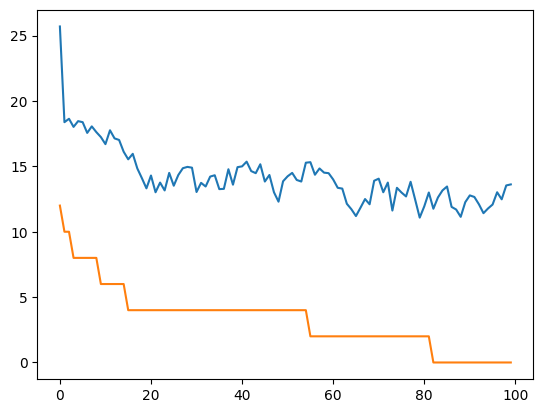

In [12]:
#Para correr todas las generaciones definidas en la inicialización de ga.

ga.best_individual()
ga.run()

fig, ax = plt.subplots()
ax.plot(generations, AvgFitGlobal)
ax.plot(generations, bestIndFit)

In [13]:
print_board(ga.best_individual()[1])
print(fitness(ga.best_individual()[1],representacion))

------------------------------------------------------------
|  |  |  |  |  |  |  |X |  |  |  |  |  |  |  |  |  |  |  |  |
------------------------------------------------------------
|  |  |  |  |  |  |  |  |  |  |  |X |  |  |  |  |  |  |  |  |
------------------------------------------------------------
|  |  |  |  |  |  |X |  |  |  |  |  |  |  |  |  |  |  |  |  |
------------------------------------------------------------
|  |  |X |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
------------------------------------------------------------
|  |  |  |  |  |  |  |  |  |X |  |  |  |  |  |  |  |  |  |  |
------------------------------------------------------------
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |X |  |  |
------------------------------------------------------------
|  |  |  |  |  |  |  |  |  |  |  |  |X |  |  |  |  |  |  |  |
------------------------------------------------------------
|  |  |  |X |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
----------------